# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


In [ ]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [ ]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, we need to mount our local drive to the colab network

In [ ]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


Mounted at /content/drive


In [ ]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali.csv
Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2021.csv to votes per city 2021.csv


In [ ]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2021".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')

421619 votes in March 2021 מעטפות חיצוניות 


In [ ]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()

,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
from matplotlib import pyplot as plt


In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.001)  # total votes for each party

Create a dictionary mapping parties names to voting letters

In [ ]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


Read the election results by ballot (not city)

In [ ]:
if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally

In [ ]:
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[8:-1]] # removing "metadata" columns
df_2021_ballots_raw = df_2021_ballots_raw.drop(index = "מעטפות חיצוניות")
df_2021_ballots= df_2021_ballots.drop(index = "מעטפות חיצוניות")
df_2021_ballots = df_2021_ballots[parties_dict_2021.keys()]

In [ ]:
# Make corrections to the votes 
# Correct for voting turnout in cities/ballots (from lab2)
# df - matrix of voters for each party and each city
# v - vector of total bz"b for each city 
# Assume that for each city, the proportion for each party is the same fofr voters and non-voters
def simple_turnout_correction(df, v):
    p = df.sum().div(df.sum().sum())  # votes without correction
    exp_df = pd.DataFrame().reindex_like(df)
    if v.size == df.shape[0]:
        v_mat = pd.concat([alpha] * (df.shape[1]), axis=1)
        exp_df = np.random.binomial(df,v_mat)
    elif v.size == df.shape[1]:
        v_mat = pd.DataFrame([v]*(df.shape[0]))
        exp_df = np.random.binomial(df,v_mat)
    else:
        v_mat = v
        exp_df = np.random.binomial(df,v_mat)
    # q_hat = ...
    return pd.DataFrame(exp_df,columns=df.columns,index = df.index)

In [ ]:
bazab = df_2021_ballots_raw["בזב"]
kosher = df_2021_ballots_raw["כשרים"]
normalized_vec = bazab/kosher
alpha = kosher / bazab

n_tilda_df = df_2021_ballots.mul(normalized_vec,axis = 0).round()
n_tilda_df_2 = n_tilda_df[parties_dict_2021.keys()]
n_ij = n_tilda_df_2.sum().div(n_tilda_df_2.sum().sum())

In [ ]:
beta = np.linspace(0.2, 0.8, num=13)

In [ ]:
beta_2 = np.random.permutation(beta)
for i in range(df_2021_ballots.shape[0]-1):
    beta_rnd = np.random.permutation(beta)
    beta_2 = np.vstack((beta_2,beta_rnd))

In [ ]:
rand_matrix = pd.DataFrame(beta_2)

In [ ]:
def simulation(num_simu,df,v):
    df_estimators = pd.DataFrame(columns = df.columns)
    df_qj_hat  = pd.DataFrame(columns = df.columns)
    for i in range(num_simu):
        simu_df = simple_turnout_correction(df,v)
        norm_df = simu_df.mul(normalized_vec,axis = 0)
        p_j = simu_df.sum().div(simu_df.sum().sum())
        q_j_hat = norm_df.sum().div(norm_df.sum().sum())
        df_pj_estimators = df_estimators.append(p_j,ignore_index=True)
        df_qj_hat = df_qj_hat.append(q_j_hat,ignore_index=True)
    return df_pj_estimators,df_qj_hat

In [ ]:
p_j_alpha,q_j_alpha = simulation(50,n_tilda_df,alpha)
p_j_beta,q_j_beta = simulation(50,n_tilda_df,beta)
p_j_beta2,q_j_beta2 = simulation(50,n_tilda_df,beta_2)

In [ ]:
e_qj_a = q_j_alpha.mean()
e_pj_a = p_j_alpha.mean()
e_qj_b = q_j_beta.mean()
e_pj_b = p_j_beta.mean()
e_qj_b2 = q_j_beta2.mean()
e_pj_b2 = p_j_beta2.mean()

In [ ]:
bias_1 = q_j_alpha.mean(axis=0) - n_ij
bias_2 = q_j_beta.mean(axis=0) - n_ij
bias_3 = q_j_beta2.mean(axis=0) - n_ij

In [ ]:
mse_1 = q_j_alpha.var() + bias_1**2
mse_2 = q_j_beta.var() + bias_2**2
mse_3 = q_j_beta2.var() + bias_3**2

# Solution

# 4

# 1

# a + b

In [ ]:
def reg_ols(df):
    model = sm.OLS(bazab,df).fit()
    betas_opp = model.params
    n_ij_tilda = df.mul(betas_opp,axis=1)
    q_hat = n_ij_tilda.sum().div(n_ij_tilda.sum().sum())
    return q_hat

# 2

In [ ]:
qja_alp = reg_ols(simple_turnout_correction(n_tilda_df,alpha))
qjb = reg_ols(simple_turnout_correction(n_tilda_df,beta))
qjb_2 = reg_ols(simple_turnout_correction(n_tilda_df,beta_2))

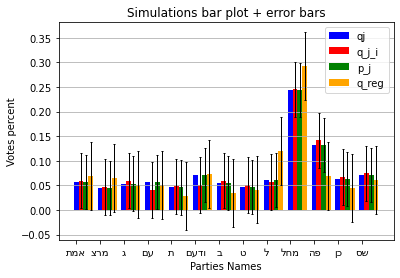

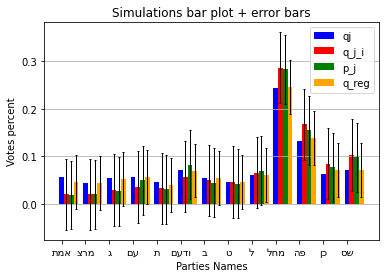

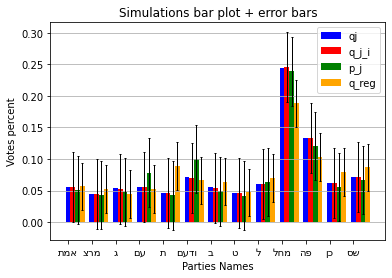

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa24de866d0>)

In [ ]:
def bar_plot_reg(qj, pj_i, q_j_hat ,q_reg):
    width = 0.2
    n = 13
    rev_names = [name[::-1] for name in list(n_tilda_df_2)]
    x_pos = np.arange(len(rev_names))
    fig, ax = plt.subplots()

    qj_bar = ax.bar(np.arange(n), list(qj), width, color='b')
    qj_i_bar = ax.bar(np.arange(n)+width, pj_i, width, color='r',yerr = pj_i.std(), align='center', capsize=10,ecolor='black',error_kw=dict(lw=1, capsize=1, capthick=1))
    p_j_bar = ax.bar(np.arange(n)+2*width, q_j_hat, width, color='g',yerr = q_j_hat.std(), align='center',capsize=10,ecolor='black',error_kw=dict(lw=1, capsize=1, capthick=1))
    q_reg_bar = ax.bar(np.arange(n)+3*width, q_reg, width, color='orange',yerr = q_reg.std(), align='center',capsize=10,ecolor='black',error_kw=dict(lw=1, capsize=1, capthick=1))

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Simulations bar plot + error bars')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((qj_bar, qj_i_bar, p_j_bar, q_reg_bar), ('qj', 'q_j_i', 'p_j', 'q_reg'))
    ax.yaxis.grid(True)
    # ax.errorbar(elinewidth=1)
    plt.show()


    return fig, ax


bar_plot_reg(n_ij, e_pj_a, e_qj_a,qja_alp)
bar_plot_reg(n_ij, e_pj_b, e_qj_b,qjb)
bar_plot_reg(n_ij, e_pj_b2, e_qj_b2,qjb_2)

from the graphs we can see that using the correction from lab 3 is much better for a city/ballot calculation. On the other hand, for the other 2 calculations the new correction (from lab 4) is better. 
In conclusion, if we think that the probality of a voter to vote depends only on the patry that he votes to, then the new correction is the best.
And if we think that the probality of a voter to vote depends on his city/ballot then we will use the old correction.



# 3

In [ ]:
df_2021_eshkol = pd.read_csv(io.BytesIO(uploaded['eshkol_hevrati_calcali.csv']),  encoding = 'iso-8859-8')
check_merg = df_2021_raw.merge(df_2021_eshkol, how = 'inner',right_on = "set_code", left_on = "סמל ישוב")
names_idx = df_2021_raw.index[df_2021_raw["סמל ישוב"].isin(df_2021_eshkol["set_code"])]
final_df = check_merg.set_axis(names_idx)
print(final_df.shape[0])
print(df_2021_raw.shape[0]-final_df.shape[0])
final_df.head()

1171
44


,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46,set_code,name,population,index_value,eco_level
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN,1220,??????,194.0,0.734,7
אדירים,5,113,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN,113,??????,267.0,0.011,5
אושה,8,278,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN,278,????,462.0,0.873,7
אחווה,17,1157,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN,1157,?????,159.0,1.085,8
איבים,17,338,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN,338,?????,277.0,-2.401,1


As we can see from the above data, 1171 citys stayed with data and we lost 44 citys that dont have data on both of the data sets.

In [ ]:
merge_13 = final_df[parties_dict_2021.keys()]
q_merge = merge_13.sum().div(merge_13.sum().sum())

In [ ]:
def old_vs_new(df, thresh, df_2):
    width = 0.3  # set column width 
    votes = df.sum().div(df.sum().sum())  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    names = [parties_dict_2021[name] for name in list(names)]
    rev_names = [party[::-1] for party in names]
    fig, ax = plt.subplots()  # plt.subplots()
    df = votes.sort_values()
    df_2.sort_values()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='r')
    city_bar = ax.bar(np.arange(n)+width, list(df_2), width, color='black')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2021')
    ax.set_xticks(np.arange(n),)
    ax.set_xticklabels(rev_names,rotation=90)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', "new israel"))
    plt.show()

    return fig, ax

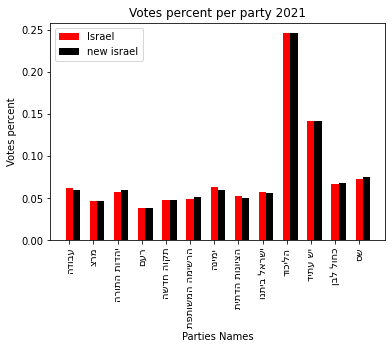

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa24e074050>)

In [ ]:
old_vs_new(df_2021[parties_dict_2021.keys()],0.035,q_merge)

For the big partys we don't see any different at all, We can see that the religous partys and the right partys had an increase in the votes and the small and lefty partys had a decrease.

# 4
# a

1
2
3
4
5
6
7
8
9
10


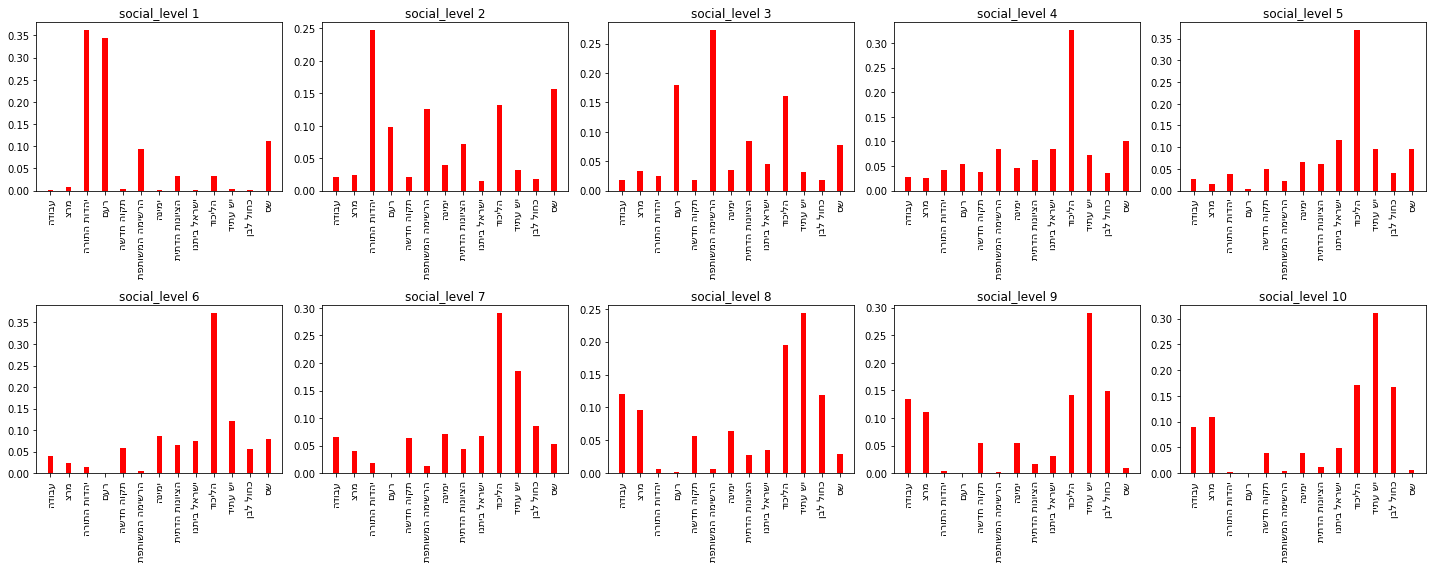

In [ ]:
def plot_derugs():
    fig , axes = plt.subplots(figsize = (20,8),nrows = 2,ncols = 5)
    names = parties_dict_2021.keys()
    names = [parties_dict_2021[name] for name in list(names)]
    rev_names = [party[::-1] for party in names]
    social_lvl =1
    for n in range(2):
        for m in range(5):
            print(social_lvl)
            data_to_plot = final_df[final_df.eco_level.eq(social_lvl)]
            rdy_to_plot = data_to_plot[parties_dict_2021.keys()]
            p = rdy_to_plot.sum().div(rdy_to_plot.sum().sum())
            axes[n,m].bar(np.arange(13), list(p),0.3,color = "r")
            axes[n,m].set_xticks(range(0,13))
            axes[n,m].set_title('social_level ' + str(social_lvl))
            axes[n,m].set_xticklabels(rev_names,rotation=90)
            social_lvl += 1
    fig.tight_layout()        
    plt.show
plot_derugs()

# b

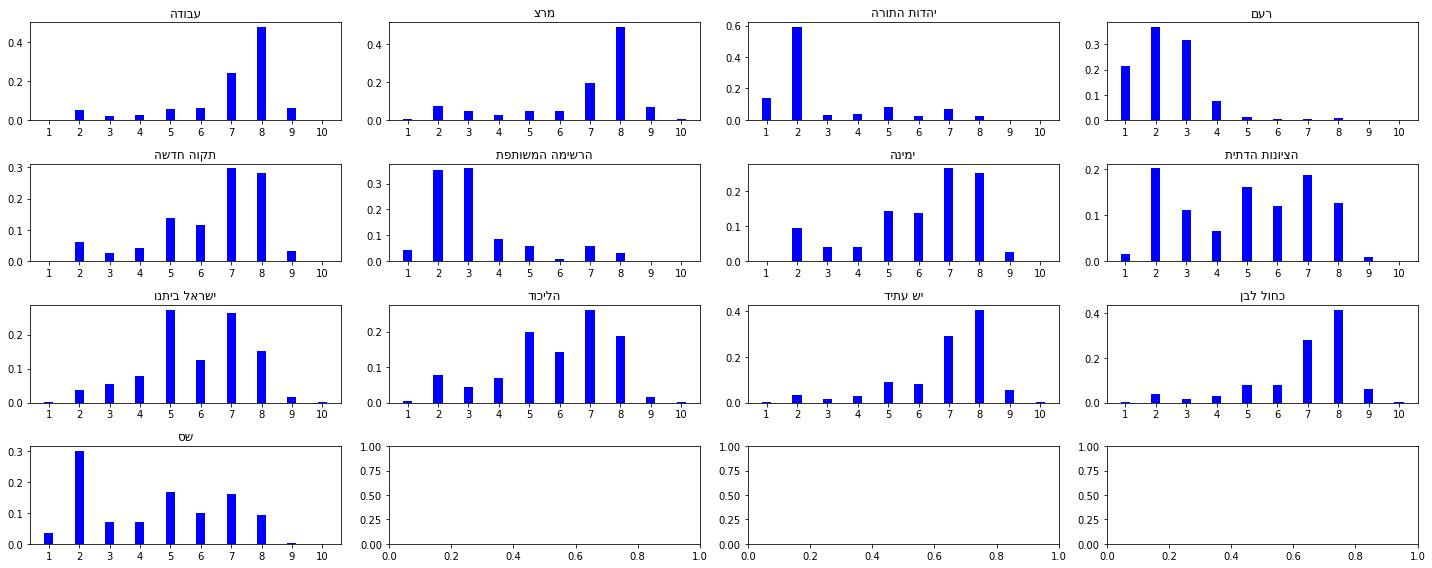

In [ ]:
def plot_eshkolot():
    for_agg = final_df.loc[:,list(parties_dict_2021.keys())+['eco_level']]
    nice_data = for_agg.groupby('eco_level').agg("sum")
    p_mat = nice_data.div(nice_data.sum())
    fig , axes = plt.subplots(figsize = (20,8),nrows = 4,ncols = 4)
    party_con =0
    for n in range(4):
        for m in range(4):
            axes[n,m].bar(np.arange(10), list(p_mat[p_mat.columns[party_con]]),0.3,color = "b")
            axes[n,m].set_xticks(range(0,10))
            axes[n,m].set_title(parties_dict_2021[p_mat.columns[party_con]][::-1])
            axes[n,m].set_xticklabels(np.arange(1,11))
            party_con +=1
            if party_con == 13:
                fig.tight_layout()        
                plt.show
                break
plot_eshkolot()